# Assignment: Lending Club Case Study
Team : Supriya Uppala and Tamilarasan

Date :

# Business Understanding
We are working for a consumer finance company specializing in lending various loans to urban customers. When the company receives a loan
application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s
decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is expected to default, then approving the loan may lead to a financial loss for the companypany

# Objective
The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment

In [223]:
# Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sea
import datetime as dt
from IPython.core.display import HTML
import warnings

warnings.filterwarnings('ignore') # to ignore the warnings

# 1. Data Cleaning

### 1.1 To check if there is any headers/footers or summary details rows are there and delete it.

In [224]:
# Loading the loan data and converting into dataframe
# Giving the local path to the dataset as a parameter in the below lines of code
loan_df = pd.read_csv("loan.csv")

# To view a glimpse of loan dataset and its various parameters
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [225]:
# Let us check the shape of the dataset
loan_df.shape
# Number of rows: 39717, and Number of columns: 111

(39717, 111)

In [226]:
# We can see that there is no headers or summary row presents from above dataframe. Lets check for footers rows.
loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
# Checking the loan status column if there are any unnecessary rows
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [228]:
#Dropping the rows for loan_status=='Current' as the loan currently in progress and cannot contribute to conclusive evidence if the customer will default of pay in future.
loan_df= loan_df[loan_df['loan_status']!='Current']
print("Total number of rows now:",len(loan_df)) ## Total no of rows now.

Total number of rows now: 38577


### 1.2 Delete the Uneccessasry Columns.

In [229]:
loan_df.shape # to get the shape of data

(38577, 111)

In [230]:
# To Check the details of columns if the they are nulls or blanks as value.
(loan_df.isnull().sum()*100)/len(loan_df)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [231]:
# We can see that there are many columns that have all the values as null/blanks and don't participate in analysis.
#Hence removing them
print("Total columns with values NA: ", len(loan_df.columns[loan_df.isna().all()].tolist()))
na_columns=list(loan_df.columns[loan_df.isna().all()])
print("NA colums List:")
na_columns

Total columns with values NA:  55
NA colums List:


['next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_

In [232]:
# Deleting the columns which is having all rows values as na.
loan_df = loan_df.dropna(axis=1, how="all")
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [19]:
# Deleting the rows which is having all columns values as na.
loan_df = loan_df.dropna(axis=0, how="all")
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [233]:
# Lets check the columns whose value is unique in nature as it doesnot make any sense performing EDA on the columns whose each and every value is unique and doesnot give insights
unique_columns = [col for col in loan_df.columns if loan_df[col].nunique() == len(loan_df)]
unique_columns

['id', 'member_id', 'url']

In [234]:
# We will delete'member_id', and 'url' as it doesn't count in EDA. Will keep the id columns which will be used for creating pivot table
loan_df.drop(['url','member_id'],axis=1, inplace=True)

In [235]:
loan_df.shape

(38577, 54)

In [236]:
# Lets delete the column which is having text/description values as they don't contribute to EDA.
loan_df.drop(columns=['desc','title'],inplace=True)
loan_df.shape

(38577, 52)

In [237]:
# We will limit our analysis till Group level only. Hence deleting the subgroups.
loan_df = loan_df.drop(['sub_grade'],  axis=1)

In [238]:
#Behavioural data is captured post loan approval and will not be available during the loan approval process. Hence removing these fields.
behavioural_cols=['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                          'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'application_type','last_pymnt_d','last_credit_pull_d']

loan_df=loan_df.drop(behavioural_cols,axis=1)

In [239]:
loan_df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
addr_state                       50
issue_d                          55
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5215
funded_amnt_inv                8050
installment                 

In [240]:
# Example most of the columns values is 1. Deleting them as well as they will not make any sense in EDA as the value is same for all the rows
for column in loan_df.columns:
    if loan_df[column].nunique(dropna=True) == 1:
        print(column)
        loan_df = loan_df.drop(column, axis=1)
print("-------------")
loan_df

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens
-------------


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,...,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,NaN,NaN,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,...,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,NaN,NaN,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,...,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,NaN,NaN,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,...,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,35.0,NaN,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,...,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,FiSite Research,4 years,...,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,0.0,0.0,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,"Squarewave Solutions, Ltd.",3 years,...,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,5.0,0.0,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,NaN,< 1 year,...,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,0.0,0.0,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,NaN,< 1 year,...,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,0.0,0.0,NaN


In [241]:
#Dropping the columns which are having more than 50% of rows have values as null.
total_rows = len(loan_df)
for column in loan_df.columns:
    if loan_df[column].isna().mean().round(2) >= 0.50:
        print(column)
        loan_df = loan_df.drop(column, axis=1)
loan_df.shape

mths_since_last_delinq
mths_since_last_record


(38577, 20)

In [242]:
#Deleting emp_title as its description or textual informations and doesn't participate in EDA analysis.
loan_df=loan_df.drop(['emp_title'], axis=1)

# 2. Data Conversion

In [243]:
loan_df.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [244]:
loan_df['term'].value_counts()

term
 36 months    29096
 60 months     9481
Name: count, dtype: int64

In [245]:
# Convert term from string to int.
loan_df['term'] = loan_df['term'].apply(lambda term: int(term.strip().split()[0])) ## removing the string parts of int value
loan_df['term'].dtype

dtype('int64')

In [246]:
loan_df['int_rate'].value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [247]:
# Convert int_rate from string to float.
loan_df['int_rate']=loan_df['int_rate'].str.strip('%').astype(float)
loan_df['int_rate'].value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

In [37]:
# Convert the column loan_funded_amnt and funded_amnt as float64
loan_df = loan_df.astype({'loan_amnt':'float','funded_amnt':'float'})
loan_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500.0,2500.0,1075.0,36,8.07,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,NaN
39713,90665,8500.0,8500.0,875.0,36,10.28,275.38,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,NaN
39714,90395,5000.0,5000.0,1325.0,36,8.07,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,NaN
39715,90376,5000.0,5000.0,650.0,36,7.43,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,NaN


In [248]:
# check grade datatype.
loan_df['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [249]:
loan_df['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [250]:
# Rounding off the below column values to two decimals points.
for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    loan_df[col] = loan_df[col].apply(lambda x: round(x,2))
    print(loan_df[col])

0         5000
1         2500
2         2400
3        10000
5         5000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: loan_amnt, Length: 38577, dtype: int64
0         5000
1         2500
2         2400
3        10000
5         5000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: funded_amnt, Length: 38577, dtype: int64
0         4975.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 38577, dtype: float64
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64
0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
         ...  
39712    11.33
39713     6.40
39714  

In [251]:
#converting issue_d`to date type as it will help in easily deriving year and month in our analysis
loan_df['issue_d'] = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [252]:
# Checking how much percentage of data is null each column
(loan_df.isnull().sum()*100)/len(loan_df)

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

# 3. Dropping or Imputing the rows

In [253]:
# Dropping the null rows for emp_length and pub_rec_bankruptcies columns as number of null rows are very less.
prev_rows=len(loan_df)
prev_rows

38577

In [254]:
loan_df= loan_df[loan_df['emp_length'].notna()]
loan_df= loan_df[loan_df['pub_rec_bankruptcies'].notna()]

In [255]:
after_rows=len(loan_df)
total_deleted=((prev_rows-after_rows)*100)/prev_rows
print("Total % of rows deleted:",round(total_deleted,2))
print(loan_df.shape)

Total % of rows deleted: 4.48
(36847, 19)


In [256]:
# Checking for null values percentage again
(loan_df.isnull().sum()*100)/len(loan_df) # so no na any mmore

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [257]:
def strip_emp_length(x):
  x=x.strip("years")
  x=x.strip("<")
  x=x.replace(" ", "")
  x=x.replace("+", "")
  return x

loan_df['emp_length']=loan_df['emp_length'].apply(lambda x : strip_emp_length(x) )

In [258]:
print(loan_df['emp_length'])

0        10
1         1
2        10
3        10
5         3
         ..
39562     1
39573     3
39623     8
39666     2
39680     2
Name: emp_length, Length: 36847, dtype: object


# 4. Derived Metrics

In [259]:
# Creating a derived columns for issue month and issue year from issues date
loan_df['issue_year']=pd.DatetimeIndex(loan_df['issue_d']).year
loan_df['issue_month']=pd.DatetimeIndex(loan_df['issue_d']).month

# 5. Removing outliers

(36847, 21)
count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


<Axes: >

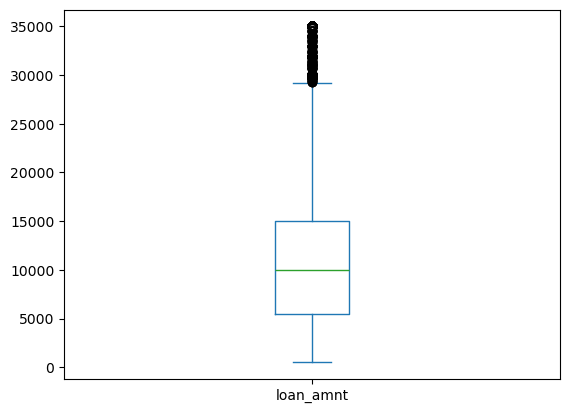

In [260]:
print(loan_df.shape)
print(loan_df["loan_amnt"].describe())
loan_df['loan_amnt'].plot(kind='box')

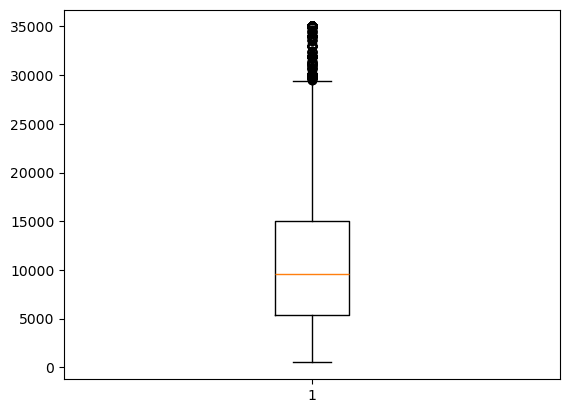

In [261]:
plot.boxplot(loan_df['funded_amnt'])
plot.show()

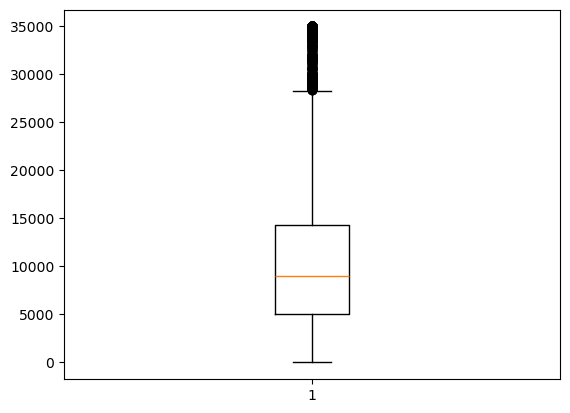

In [262]:
plot.boxplot(loan_df['funded_amnt_inv'])
plot.show()

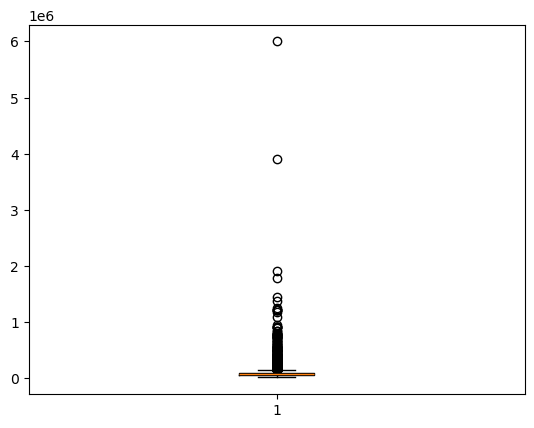

In [263]:
plot.boxplot(loan_df['annual_inc'])
plot.show()

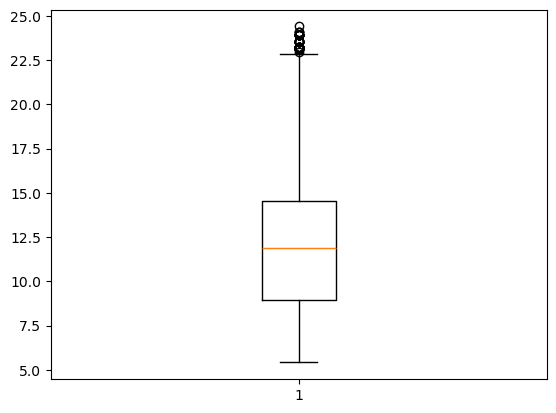

In [264]:
plot.boxplot(loan_df['int_rate'])
plot.show()

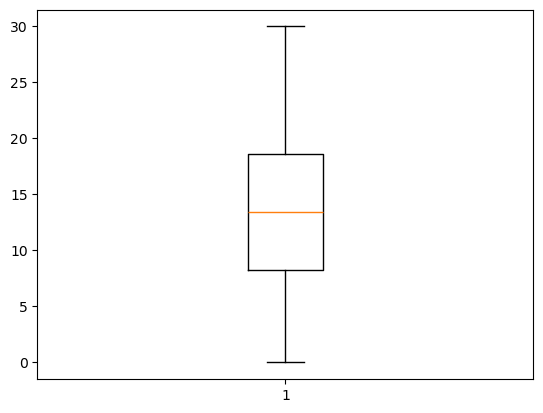

In [265]:
plot.boxplot(loan_df['dti'])
plot.show()

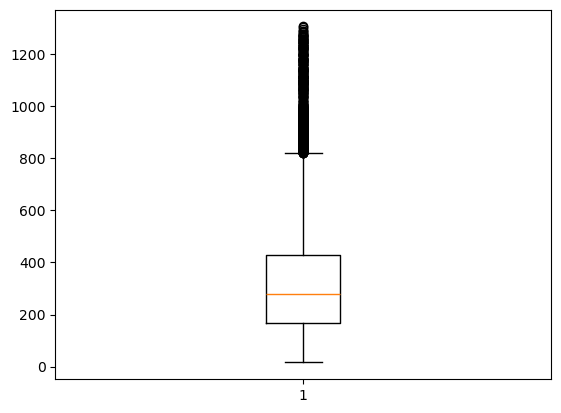

In [266]:
plot.boxplot(loan_df['installment'])
plot.show()

In [267]:
# From above box plts we can see there is otliers exits for columns'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc'.
# Lets remove the outlier
outliers_columns_set1= ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
outliers_columns_set2=['int_rate', 'installment', 'annual_inc']
# Define a function to remove outliers based on IQR
def remove_outliers_iqr(data, columns,threshold):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove outliers from the DataFrame
loan_df =remove_outliers_iqr(loan_df, outliers_columns_set1,1.5)
loan_df =remove_outliers_iqr(loan_df, outliers_columns_set2,1.5)

##### Checking if outliers got removed

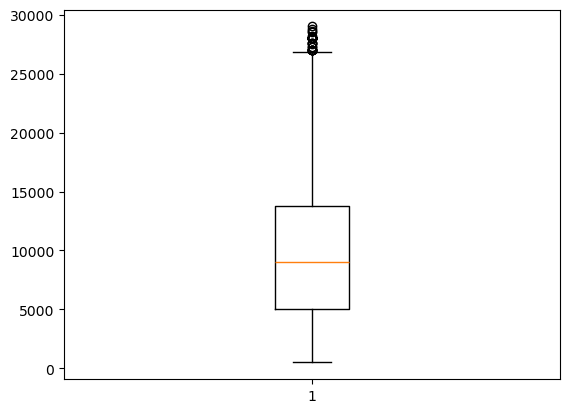

In [268]:
plot.boxplot(loan_df['loan_amnt'])
plot.show()

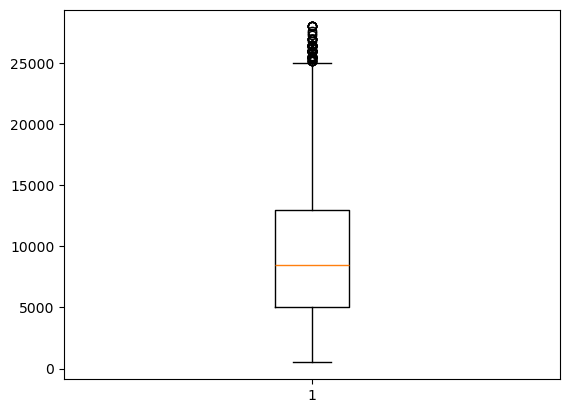

In [269]:
plot.boxplot(loan_df['funded_amnt'])
plot.show()

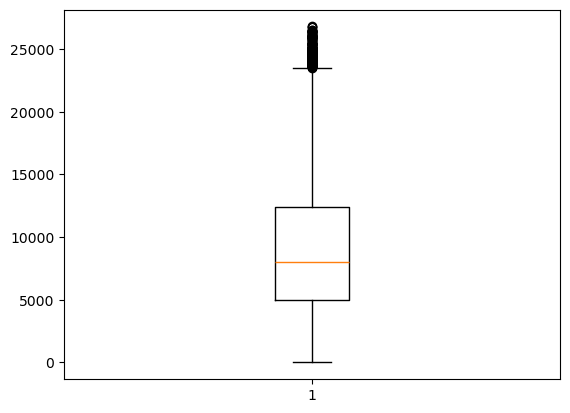

In [270]:
plot.boxplot(loan_df['funded_amnt_inv'])
plot.show()

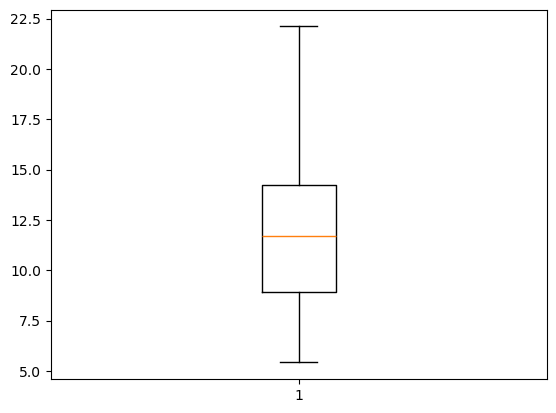

In [271]:
plot.boxplot(loan_df['int_rate'])
plot.show()

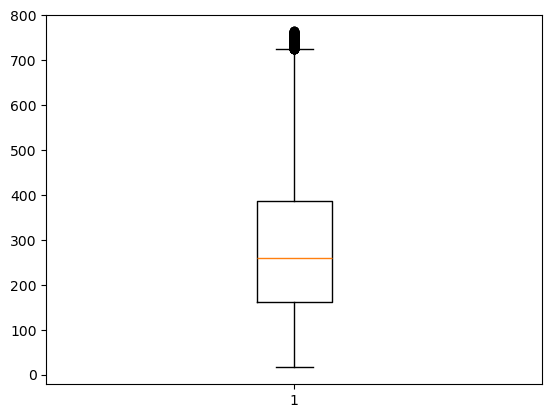

In [272]:
plot.boxplot(loan_df['installment'])
plot.show()

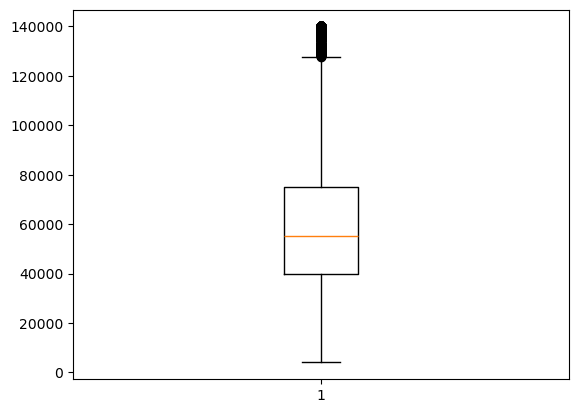

In [273]:
plot.boxplot(loan_df['annual_inc'])
plot.show()

##### As you can see, the outliers got removed, we can start with the analysis

# 6. Univariate Analysis

Now the data is cleaned and prepared for analysis, we can proceed with our analysis

In [274]:
# Function for dividing a column into Bins
def divide_bins(column):
    new_column = column + '_range'
    labels = ['Lowest ','Lower ','Medium ','Higher ','Highest ']
    labels = [labels[p] + '(' +
        str(round(np.nanpercentile(loan_df[column], p * 20),2)) + ' - ' +
        str(round(np.nanpercentile(loan_df[column], (p+1) * 20),2))+ ')'
    for p in range(5)]
    loan_df[new_column] = pd.qcut(loan_df[column], q=5, labels=labels)

In [275]:
divide_bins('loan_amnt')

In [276]:
loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month,loan_amnt_range
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,10,RENT,...,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0,2011,12,Lower (4800.0 - 7200.0)
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,1,RENT,...,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0,2011,12,Lowest (500.0 - 4800.0)
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,10,RENT,...,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0,2011,12,Lowest (500.0 - 4800.0)
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,10,RENT,...,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0,2011,12,Medium (7200.0 - 10000.0)
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,3,RENT,...,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0,2011,12,Lower (4800.0 - 7200.0)


In [277]:
# Dividing loan_amnt column into bins and creating new column loan_amnt_range
loan_df['loan_amnt_range']

0            Lower (4800.0 - 7200.0)
1            Lowest (500.0 - 4800.0)
2            Lowest (500.0 - 4800.0)
3          Medium (7200.0 - 10000.0)
5            Lower (4800.0 - 7200.0)
                    ...             
39562        Lowest (500.0 - 4800.0)
39573        Lower (4800.0 - 7200.0)
39623      Medium (7200.0 - 10000.0)
39666    Highest (15000.0 - 29000.0)
39680        Lowest (500.0 - 4800.0)
Name: loan_amnt_range, Length: 33191, dtype: category
Categories (5, object): ['Lowest (500.0 - 4800.0)' < 'Lower (4800.0 - 7200.0)' < 'Medium (7200.0 - 10000.0)' < 'Higher (10000.0 - 15000.0)' < 'Highest (15000.0 - 29000.0)']

In [278]:
# Function for plotting count plot
def plot_count_chart(column):
    
    fig, ax = plot.subplots(figsize=(8,6))
    ax.tick_params(axis='x', rotation=90)
    sea.countplot(data=loan_df, x=column, hue='loan_status', ax=ax, 
    order=loan_df[column].value_counts().index, hue_order=['Fully Paid','Charged Off'])
            
    df = loan_df.groupby([column])['loan_status'].value_counts(normalize=True
                                                        ).rename('Charged off %').reset_index().sort_values(column)
    df = df.loc[df['loan_status']=='Charged Off'].sort_values(by='Charged off %', ascending=False).drop(columns=['loan_status'])
    df2 = loan_df.groupby([column])['loan_status'].count()
    df = df.merge(right=df2,on=column).rename(columns={'loan_status':'Record count'})
    df['Charged off %'] = round(df['Charged off %']*100,2)
    display(HTML(df.to_html(index=False)))
     

loan_amnt_range,Charged off %,Record count
Highest (16000.0 - 35000.0),18.52,7345
Higher (11500.0 - 16000.0),14.30,7335
Lowest (500.0 - 5000.0),13.50,8855
Medium (8000.0 - 11500.0),12.79,5980
Lower (5000.0 - 8000.0),12.44,7332


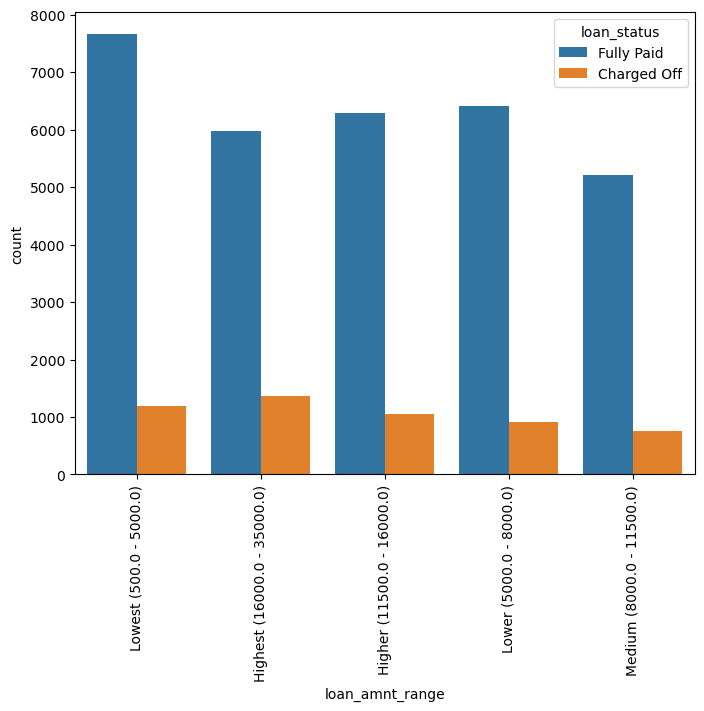

In [114]:
# plotting count chart on newly created column loan_amnt_range
plot_count_chart('loan_amnt_range')

#### Observation
Higher the loan amount, high probability of loan getting charged off

In [279]:
# Dividing int_rate column into bins and creating new column int_rate_range
divide_bins('int_rate')

int_rate_range,Charged off %,Record count
Highest (14.91 - 22.11),25.73,6599
Higher (12.69 - 14.91),16.54,6595
Medium (10.75 - 12.69),14.06,6565
Lower (7.88 - 10.75),9.98,6696
Lowest (5.42 - 7.88),4.96,6736


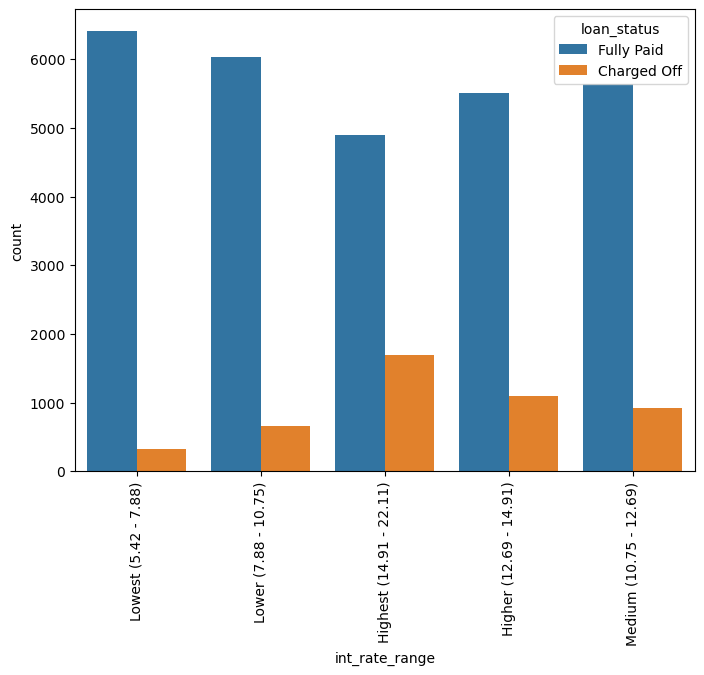

In [280]:
# Plotting count chart on new column int_rate_range
plot_count_chart('int_rate_range')

#### Observation
From the above plot, we can conclude that if interest rates are higher, the probability of loan getting charged off is also high

In [281]:
# Dividing installment column into bins and creating new column installment_range
divide_bins('installment')

installment_range,Charged off %,Record count
Highest (421.22 - 763.83),15.49,6637
Higher (310.1 - 421.22),14.36,6622
Lowest (16.08 - 141.17),14.08,6639
Medium (215.89 - 310.1),13.89,6647
Lower (141.17 - 215.89),13.20,6646


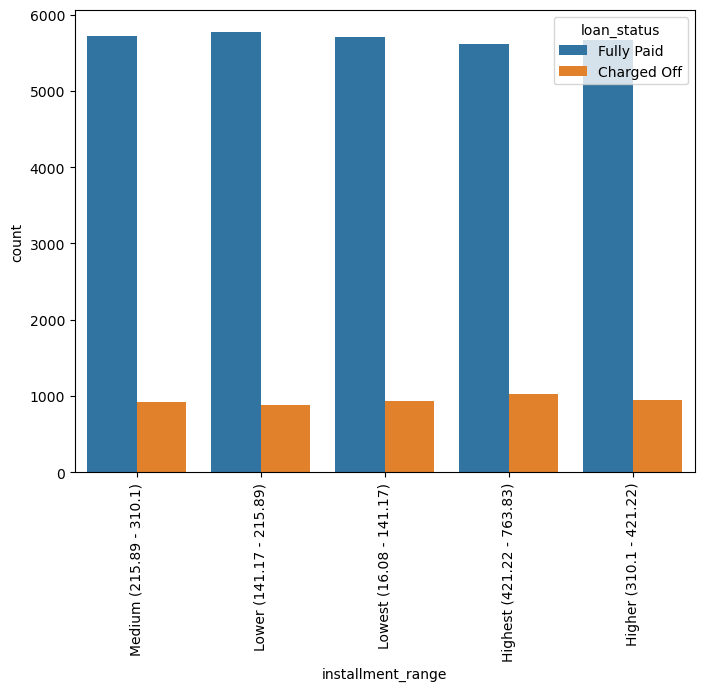

In [282]:
# Plotting count chart on new column installment_range
plot_count_chart('installment_range')

#### Observation
Higher the installment amount, greater the probability of loan getting charged off

In [283]:
# Dividing annual_inc column into bins and creating new column annual_inc_range
divide_bins('annual_inc')

annual_inc_range,Charged off %,Record count
Lowest (4000.0 - 36000.0),17.95,6690
Lower (36000.0 - 49800.0),15.40,6593
Medium (49800.0 - 62000.0),14.94,6765
Higher (62000.0 - 81000.0),12.70,6522
Highest (81000.0 - 140000.0),9.95,6621


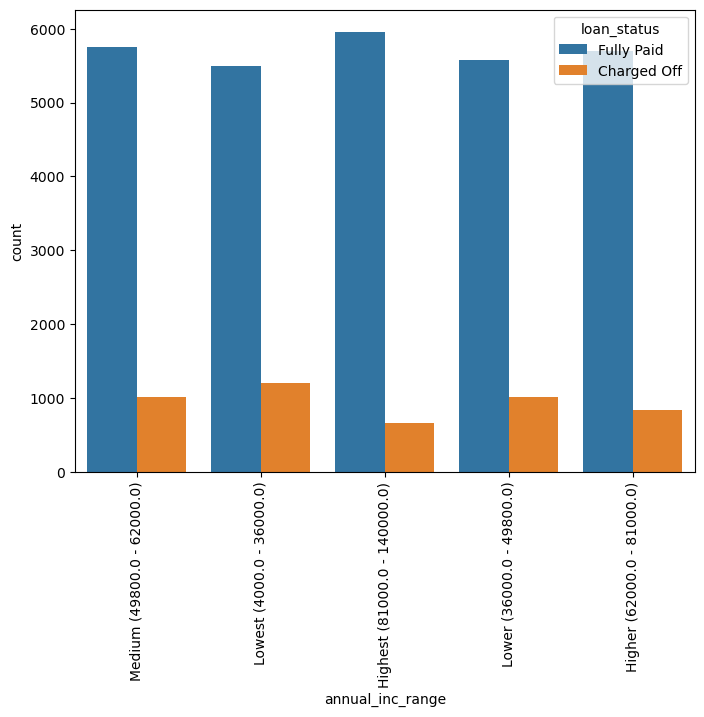

In [284]:
# Plotting count chart on new column annual_inc_range 
plot_count_chart('annual_inc_range')

#### Observation
Higher the income, lower the chances of loan getting charged off

In [285]:
# Dividing dti column into bins and creating new column dti_range
divide_bins('dti')

dti_range,Charged off %,Record count
Highest (19.87 - 29.99),16.24,6625
Higher (15.52 - 19.87),15.47,6643
Medium (11.61 - 15.52),14.61,6639
Lower (7.15 - 11.61),12.53,6642
Lowest (0.0 - 7.15),12.17,6642


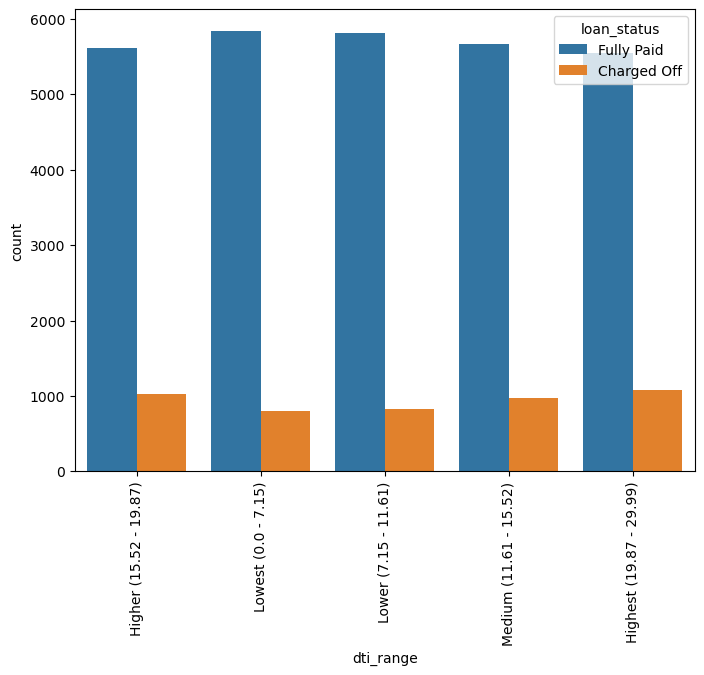

In [286]:
# Plotting count chart on new column dti_range
plot_count_chart('dti_range')

#### Observation
Higher the Debt To Income, greater the chances of loan getting charged off

In [287]:
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'pub_rec_bankruptcies', 'issue_year',
       'issue_month', 'loan_amnt_range', 'int_rate_range', 'installment_range',
       'annual_inc_range', 'dti_range'],
      dtype='object')

term,Charged off %,Record count
60,25.12,7957
36,10.76,25234


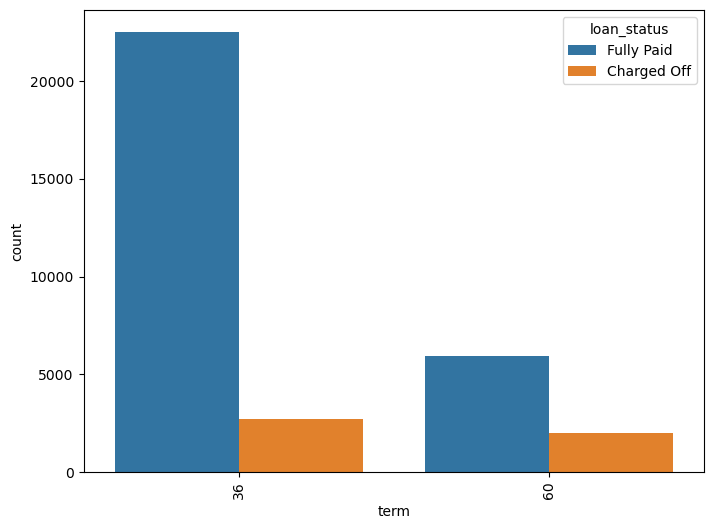

In [288]:
# Plotting count chart on column term
plot_count_chart('term')


#### Observation
Loans with 36 months term has lower chances of getting charged off. Therefore, lower the term, lower will be the probability of loan getting charged off

grade,Charged off %,Record count
G,34.59,159
F,31.43,700
E,26.84,2075
D,22.04,4270
C,17.11,6879
B,12.15,10082
A,5.97,9026


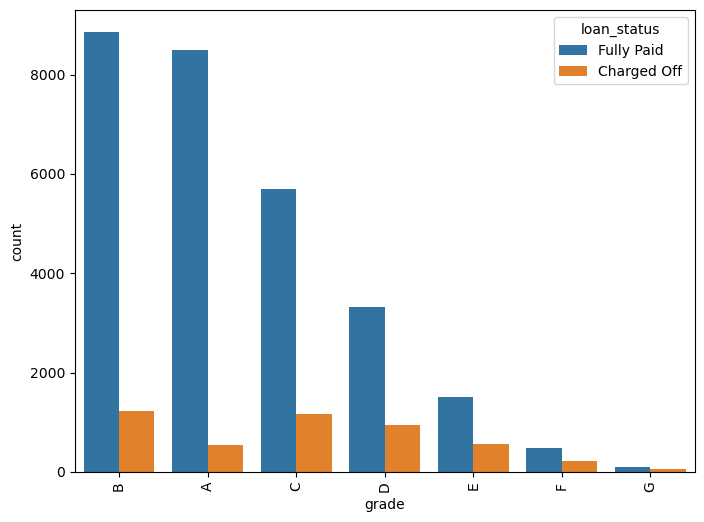

In [289]:
# Plotting count chart on column grade
plot_count_chart('grade')

#### Observation 
The loans with grades G,F,E have higher chances of getting charged off

emp_length,Charged off %,Record count
10,15.43,7149
7,15.21,1532
5,14.25,2864
8,14.24,1236
1,14.18,6883
6,14.04,1937
3,13.61,3615
4,13.38,3012
2,13.14,3882
9,13.04,1081


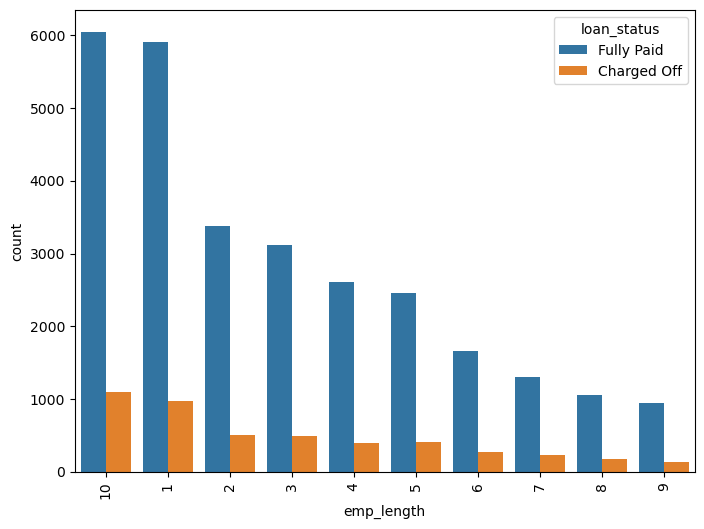

In [290]:
# Plotting count chart on column emp_length
plot_count_chart('emp_length')

#### Observation
Based on employee years of experience, we couldn't derive any pattern out of the chart

verification_status,Charged off %,Record count
Verified,16.63,9414
Source Verified,14.65,8767
Not Verified,12.42,15010


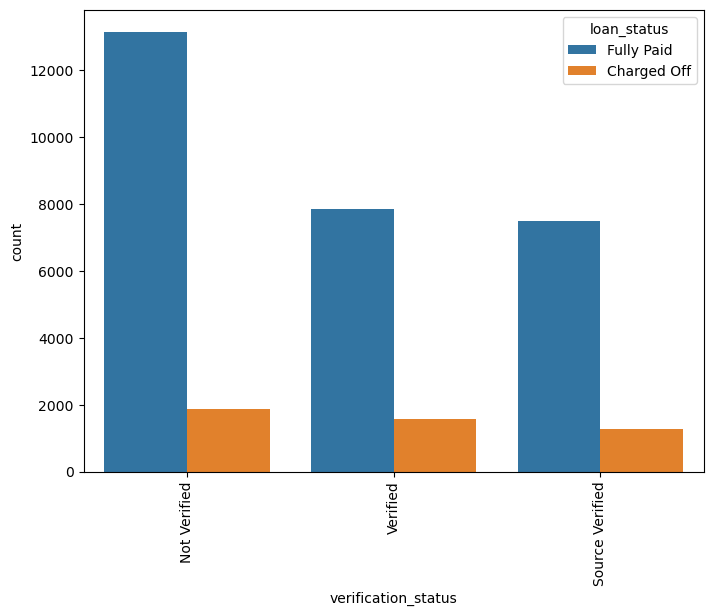

In [291]:
# Plotting count chart on column verification_status
plot_count_chart('verification_status')

#### Observation
From the above chart, we can say that there are some discrepancies in verification process as the verified applicants have higher chances of their loan getting charged off

purpose,Charged off %,Record count
small_business,26.73,1369
renewable_energy,19.28,83
house,16.44,298
educational,16.37,281
other,15.83,3354
medical,15.70,605
moving,15.43,512
debt_consolidation,14.95,15582
vacation,14.85,330
home_improvement,12.03,2303


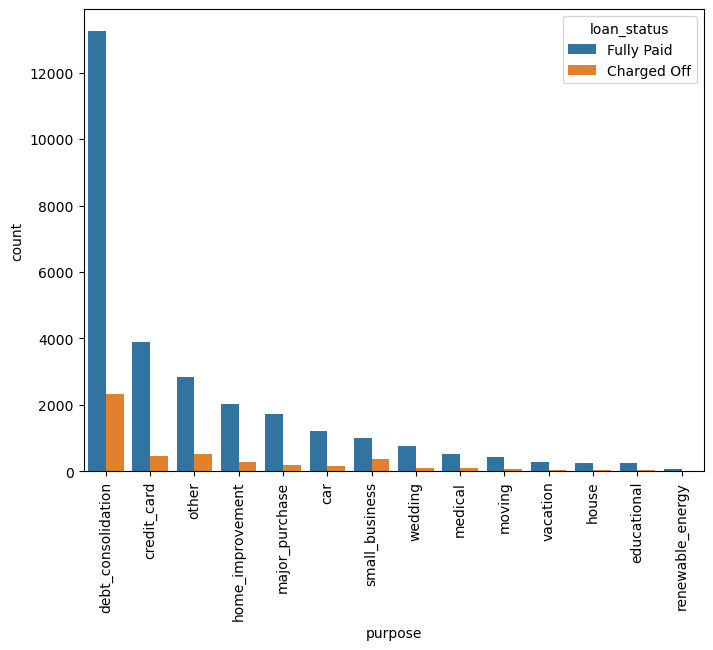

In [292]:
# Plotting count chart on column purpose
plot_count_chart('purpose')

#### Observation
We considering above 20 charged off percent as defaulting. From the above chart, small businesses have the risk of their loans getting charged off

addr_state,Charged off %,Record count
TN,22.22,9
NV,20.96,415
AK,19.05,63
HI,19.05,147
SD,18.64,59
NM,17.39,161
FL,17.22,2404
MO,16.75,591
OR,16.11,391
GA,15.79,1165


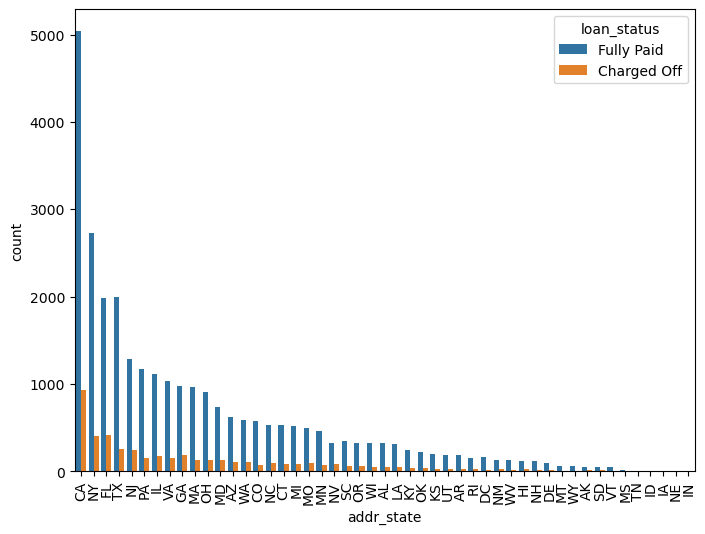

In [293]:
# Plotting count chart on column addr_state
plot_count_chart('addr_state')

#### Observation
We considering above 20 charged off percent as defaulting. From the above chart, NV, TN, AK are riskier states

pub_rec_bankruptcies,Charged off %,Record count
2.0,40.00,5
1.0,21.31,1445
0.0,13.87,31741


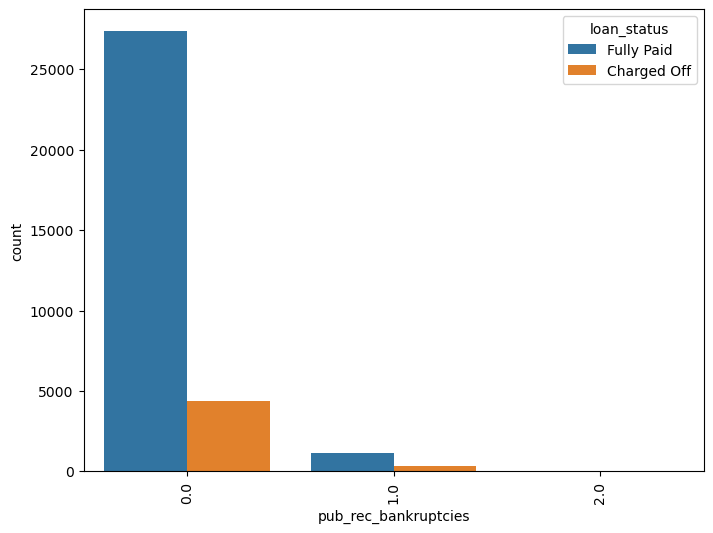

In [294]:
# Plotting count chart on column pub_rec_bankruptcies
plot_count_chart('pub_rec_bankruptcies')

#### Observation
If an applicant has a bankruptcy, then there are higher chances of defaulting the loan

issue_month,Charged off %,Record count
9,15.86,3008
12,15.75,3601
5,15.49,2589
10,14.64,3155
6,14.64,2800
11,14.24,3470
7,14.07,2949
8,13.65,2967
1,13.10,1984
4,12.72,2493


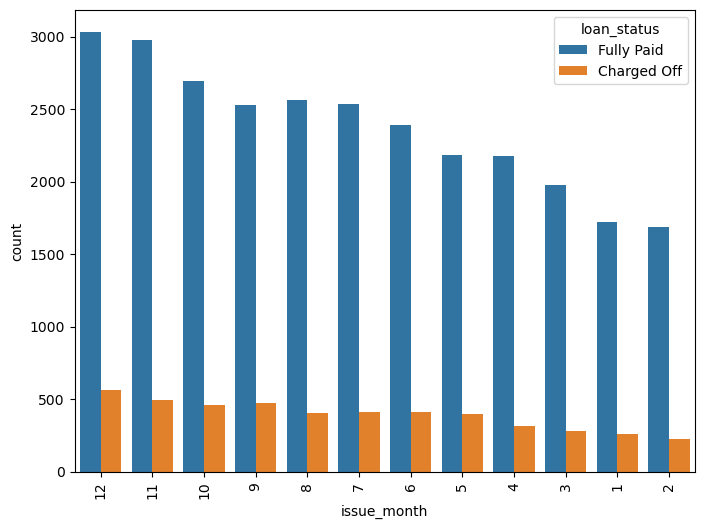

In [296]:
# Plotting count chart on column issue_month
plot_count_chart('issue_month')

#### Observation
Loans issued in months Dec, May, Sept, Oct have high chances of getting charged off 

#### Observation
Above plot shows that for higher installments for any income group have more number of defaults.

# 7. Bivariate Analysis

Now that we have analyzed each of the variables and its impact on the loan status, let us take group of variables together and and analyze their combined effect on the loan status.

In [303]:
# Changing the loan_status to numerical as pivot table cannot be drawn on non-numerical column
# changing the loan_status to a numeric variable, assign 1 for defaulted loans and 0 for paid off ones
loan_df['loan_status_num'] = loan_df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [339]:
# Function for generating heat map upon input

def Bivariate_Analysis (*, x, y, figsize=(8,6)):
    """
        Parameters:
            x, y : columns of data in the corresponding axis, both categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, does a heatmap plot
    """
    fig, ax = plot.subplots(figsize=figsize)
    pt = pd.pivot_table(data=loan_df, values='loan_status_num', index=y, columns=x)
    sea.heatmap(pt, ax=ax, cmap='BuPu')
    plot.show()

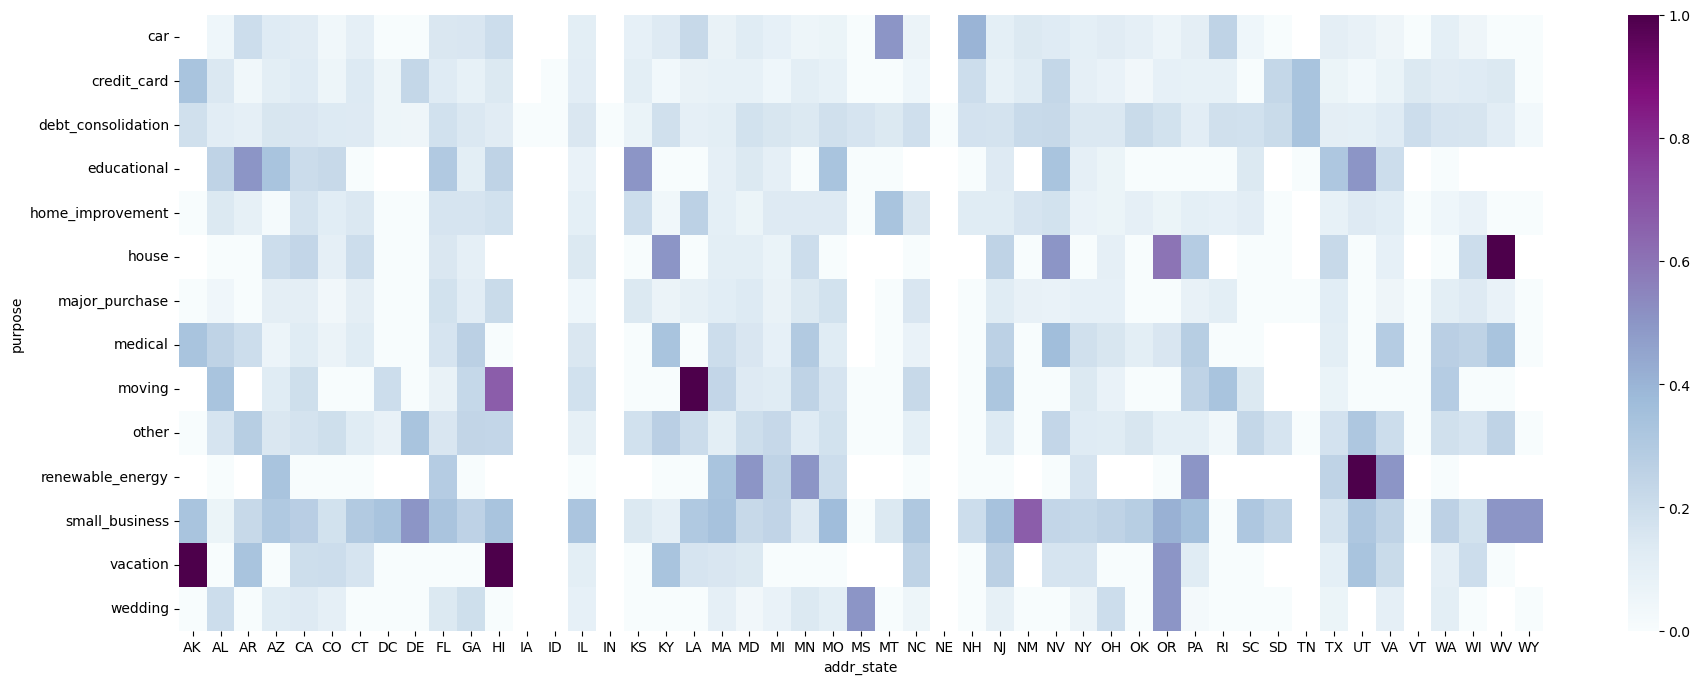

In [340]:
# Heat Map on addr_state and purpose columns
Bivariate_Analysis(x='addr_state', y='purpose', figsize=(22,8))

#### Observation
As per the above plot, the darker the intersection of addr_state has with the purpose of the loan, the risker the loan application is. Some of the examples are below:
1. vacation loans in AK, HI, OR

2. education loans in AR, KS, UT

3. small business loans in DE, NM, WV

4. Renewable Energy Loans in UT, OR

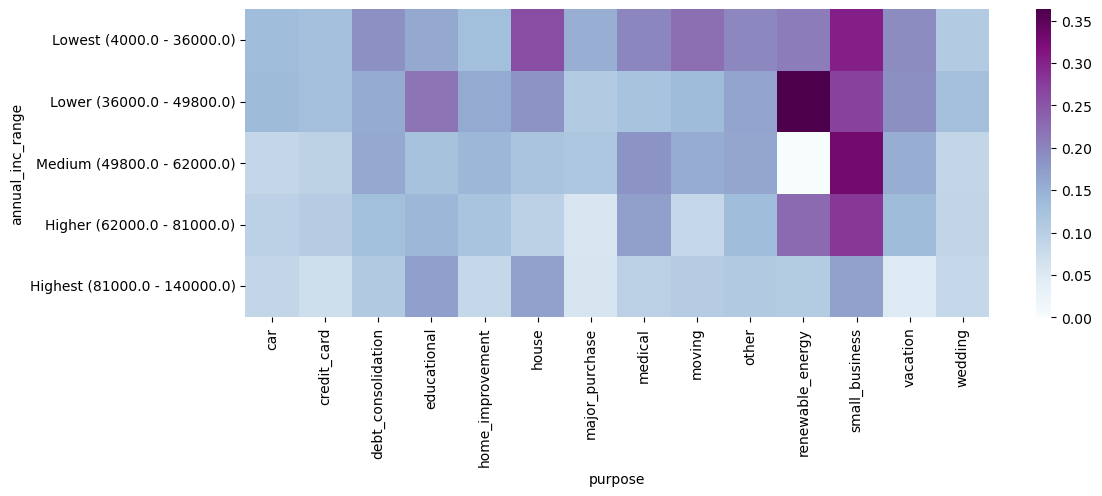

In [341]:
# Plotting the income groups against purpose
Bivariate_Analysis(x='purpose', y='annual_inc_range', figsize=(12,4))

#### Observation
Some of the risky loan applications are
1. small business loans for lowest and medium income groups

2. Renewable energy loans for lower income group

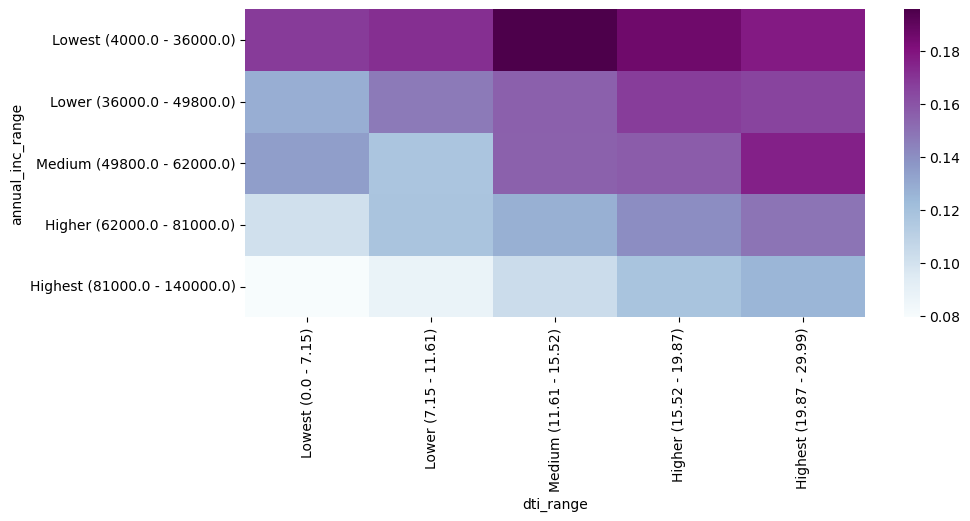

In [342]:
# Plotting the annual_inc_range against dti_range
Bivariate_Analysis(x='dti_range', y='annual_inc_range', figsize=(10,4))

#### Observation
Medium debt-to-income group in the lowest income range poses the highest risk

# Conclusion

1. Lowest income group i.e between 4000 and 36000 annual income have high chances of defaulting the loans
2. High loan amounts are also leading to charge offs
3. Loan applicants with high debt to income ratio has shown higher risk
4. Verification process is faulty because verified applicants has shown greater charge off
5. Applicants with history of bankruptcy has found to be risky
6. small business loans for lowest and medium income groups and renewable energy loans for lower income group has shown greater Charge Off
7.  NV, TN, AK are found to be risky states


    We end our EDA here.We have taken many references from internet and our EDA Module since we were doing this for the first time. We found out some interesting patterns but we stuck to what is required for business. Hope our EDA results are useful.


                                                n